# Project3: RL and IRL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.pyplot import MultipleLocator

## Question 1

In [2]:
reward_1 = np.zeros((10,10))
reward_2 = np.zeros((10,10))
reward_1[2:4,5:7] = -10
reward_1[4:6,1:3] = -10
reward_1[8:10,2:4] = -10
reward_1[9,9] = 1
reward_2[1:7,4] = -100
reward_2[1,5] = -100
reward_2[1:9,6] = -100
reward_2[3:8,7:9] = -100
reward_2[4:7,6:8] = 0
reward_2[9,9] = 10

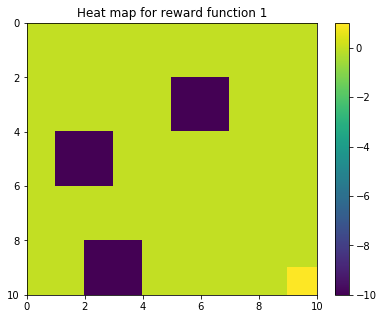

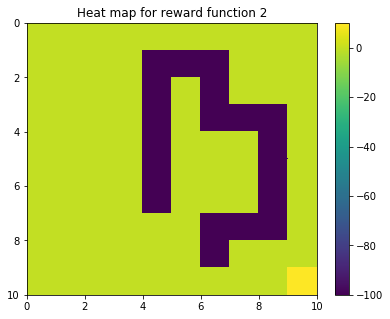

In [3]:
fig, ax1 = plt.subplots(1,1,figsize=(6.5,5))
plt.sca(ax1)
plt.pcolor(reward_1)
ax1.invert_yaxis()
plt.title("Heat map for reward function 1")
plt.colorbar()

fig, ax2 = plt.subplots(1,1,figsize=(6.5,5))
plt.sca(ax2)
plt.pcolor(reward_2)
ax2.invert_yaxis()
plt.title("Heat map for reward function 2")
plt.colorbar()
plt.show()

## Question 2

In [4]:
action_space = [(-1,0),(1,0),(0,-1),(0,1)]  #respectively up, down, left, right
w = 0.1
gamma = 0.8
reward = reward_1
epsilon = 0.01

In [5]:
def isValidAction(curr_state, action):  #if remain in the grid, return True; else return false
    s_x, s_y = curr_state
    a_x, a_y = action
    next_x, next_y = (s_x + a_x, s_y + a_y)
    if not(0<=next_x<=9) or not(0<=next_y<=9):
        return False
    else:
        return True

def get_valid_actions(curr_state):  #return a list of valid actions at current state, and the number of valid actions
    valid_actions = []
    for action in action_space:
        if isValidAction(curr_state, action):
            valid_actions.append(action)
    number_valid_actions = len(valid_actions)
    return (valid_actions, number_valid_actions)
    
def tuple_add(tuple1,tuple2):
    x1, y1 = tuple1
    x2, y2 = tuple2
    return (x1+x2, y1+y2)

In [6]:
def get_max_value_action(curr_state, reward_func, gm, value):
#curr_state is a tuple, action is a tuple in action_space
    v_a, n_v_a = get_valid_actions(curr_state) 
    #v_a is a list of valid actions at current state, and n_v_a is the number of valid actions
    value_list = []
    for a in action_space: #For every possible action, in the order of (up, down, left, right)
        new_value = 0
        
        if n_v_a == 4:  #There are 4 valid actions, i.e. at a non-boundary state
            intended_next_state = tuple_add(curr_state, a)
        elif n_v_a == 3:   #There are 3 valid actions, i.e. at one of the edge states
            if isValidAction(curr_state, a):
                intended_next_state = tuple_add(curr_state, a)
                new_value += w/4 * (reward_func[curr_state] +
                                    gm * value[curr_state])  # staying
            else:
                intended_next_state = curr_state
                new_value += (1 - w + w/4) * (reward_func[curr_state] +
                                              gm * value[curr_state])  # staying
        else:  #There are 2 valid actions, i.e. at one of the corner states
            if isValidAction(curr_state, a):
                intended_next_state = tuple_add(curr_state, a)
                new_value += (w/4)*2 * (reward_func[curr_state] +
                                        gm * value[curr_state])  # staying
            else:
                intended_next_state = curr_state
                new_value += (1 - w + w/4 + w/4) * (reward_func[curr_state] +
                                                    gm * value[curr_state])  # staying
        for p_a in v_a: #Consider every possible transition
            actual_next_state = tuple_add(curr_state, p_a)
            if intended_next_state == actual_next_state:
                probability = 1 - w + w/4
            else:
                probability = w/4
            new_value += probability * (reward_func[actual_next_state] + 
                                        gm * value[actual_next_state])
        value_list.append(new_value)
    max_value = max(value_list)
    optimal_action = value_list.index(max_value) 
    #This is an integer, the optimal action is actually action_space[optimal_action]
    
    return (max_value, optimal_action)

In [7]:
#Value Iteration
def optimal_state_value(reward_func, gamma, epsilon):
    #Initialization
    state_values = np.zeros(reward_func.shape)  
    optimal_action = np.zeros(reward_func.shape)
    delta = float('inf')
    #Estimation
    N = 0  #Count the number of iteration steps
    while delta > epsilon:  #epsilon is the estimation step
        delta = 0
        for i in range(reward_func.shape[0]):
            for j in range(reward_func.shape[1]):
                v = state_values[i][j]
                state_values[i][j], optimal_action[i][j] = get_max_value_action((i,j), reward_func, gamma, state_values)
                delta = max(delta, abs(v - state_values[i][j]))
        N += 1
    return (state_values, optimal_action, N)

In [8]:
# Here, reward = reward_1
#action_space = [(-1,0),(1,0),(0,-1),(0,1)]  #respectively up, down, left, right
reward = reward_1
optimal_value_1, optimal_action_1, iterations_1 = optimal_state_value(reward, gamma, epsilon)
#optimal_value_1
optimal_action_1
#iterations_1

array([[3., 3., 3., 3., 3., 3., 3., 3., 1., 1.],
       [3., 3., 3., 0., 0., 0., 3., 3., 1., 1.],
       [0., 0., 0., 0., 0., 0., 3., 3., 1., 1.],
       [0., 0., 3., 1., 1., 1., 1., 3., 1., 1.],
       [0., 0., 3., 3., 1., 1., 1., 1., 1., 1.],
       [1., 1., 3., 3., 1., 1., 1., 1., 1., 1.],
       [1., 3., 3., 3., 3., 3., 3., 1., 1., 1.],
       [3., 3., 3., 3., 3., 3., 3., 3., 1., 1.],
       [0., 0., 0., 3., 3., 3., 3., 3., 3., 1.],
       [0., 2., 2., 3., 3., 3., 3., 3., 3., 1.]])

In [9]:
def optimal_value_plot(value, title=""):
    fig, ax = plt.subplots(1,1,figsize=(7,7))
    plt.sca(ax)
    plt.pcolor(value, cmap = colors.ListedColormap(['white']), edgecolors = 'black')
    ax.invert_yaxis()
    ax.xaxis.set_ticks_position('top')
    major_locator = MultipleLocator(1)
    ax.xaxis.set_major_locator(major_locator)
    ax.yaxis.set_major_locator(major_locator)
    ax.set_title(title)
    for i in range(value.shape[0]):
        for j in range(value.shape[1]):
            plt.text(i+0.5, j+0.5, '%.2f' % value[j,i], horizontalalignment='center',
                    verticalalignment='center')

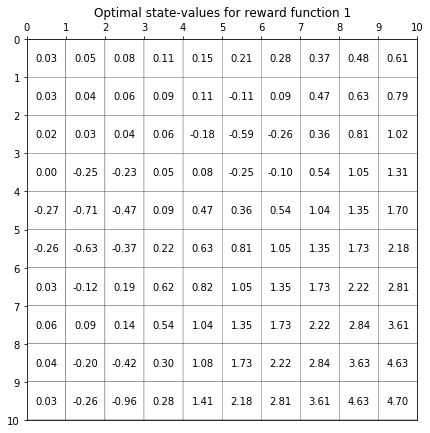

In [10]:
optimal_value_plot(optimal_value_1, title = "Optimal state-values for reward function 1")

In [11]:
print("The total number of steps for convergence for reward function 1 is: ",iterations_1)
print("The step numbers are: ",list(np.arange(1,iterations_1+1,5)))

The total number of steps for convergence for reward function 1 is:  21
The step numbers are:  [1, 6, 11, 16, 21]


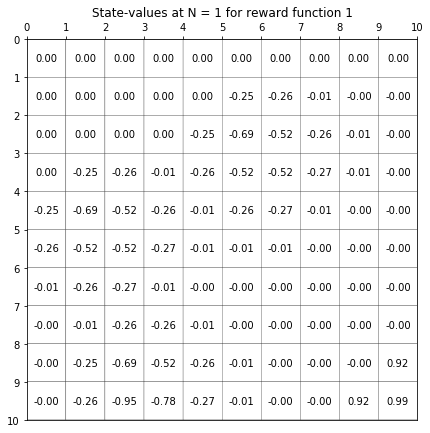

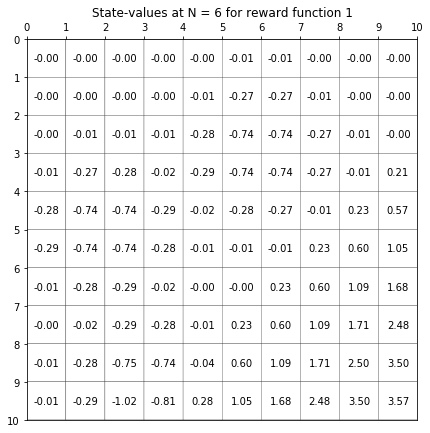

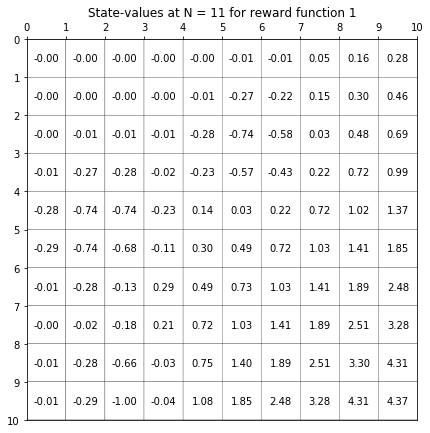

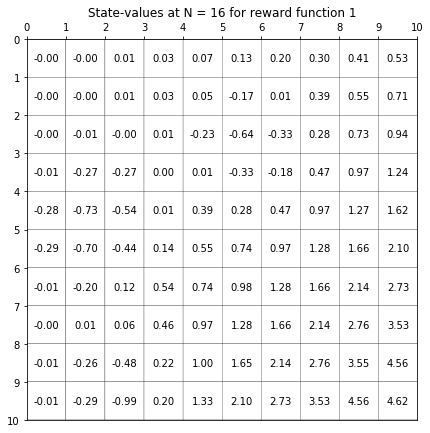

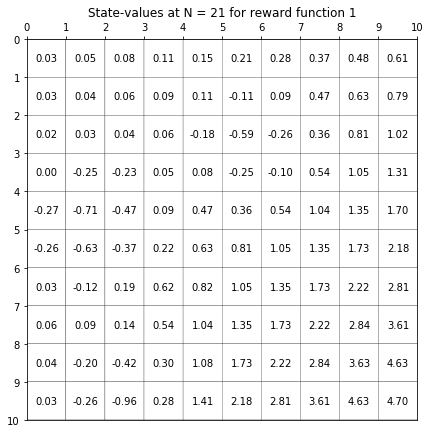

In [12]:
#Get the values at different iteration steps
#Initialization
state_values = np.zeros(reward.shape)
iteration_steps_list =list(np.arange(1,iterations_1+1,5))
value_list = []
optimal_action = np.zeros(reward.shape)
delta = float('inf')
#Estimation
N = 0  #Count the number of iteration steps
while delta > epsilon:  #epsilon is the estimation step
    delta = 0
    for i in range(reward.shape[0]):
        for j in range(reward.shape[1]):
            v = state_values[i][j]
            state_values[i][j], optimal_action[i][j] = get_max_value_action((i,j), reward, gamma, state_values)
            delta = max(delta, abs(v - state_values[i][j]))
    N += 1
    if N in iteration_steps_list:
        optimal_value_plot(state_values, 
                           title = "State-values at N = {} for reward function 1".format(N))
    

## Question 3

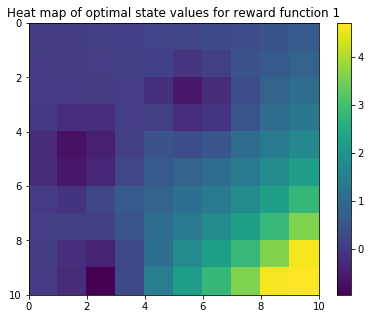

In [13]:
fig, ax = plt.subplots(1,1,figsize=(6.5,5))
plt.sca(ax)
plt.pcolor(optimal_value_1)
ax.invert_yaxis()
plt.title("Heat map of optimal state values for reward function 1")
plt.colorbar()
plt.show()

## Question 4

**See the report**

## Question 5

In [14]:
action_arrows = ['↑','↓','←','→']
def optimal_action_plot(optimal_action, title=""):
    fig, ax = plt.subplots(1,1,figsize=(7,7))
    plt.sca(ax)
    plt.pcolor(optimal_action, cmap = colors.ListedColormap(['white']), edgecolors = 'black')
    ax.invert_yaxis()
    ax.xaxis.set_ticks_position('top')
    major_locator = MultipleLocator(1)
    ax.xaxis.set_major_locator(major_locator)
    ax.yaxis.set_major_locator(major_locator)
    ax.set_title(title)
    for i in range(optimal_action.shape[0]):
        for j in range(optimal_action.shape[1]):
            plt.text(i+0.5, j+0.5, action_arrows[int(optimal_action[j][i])], horizontalalignment='center',
                    verticalalignment='center')

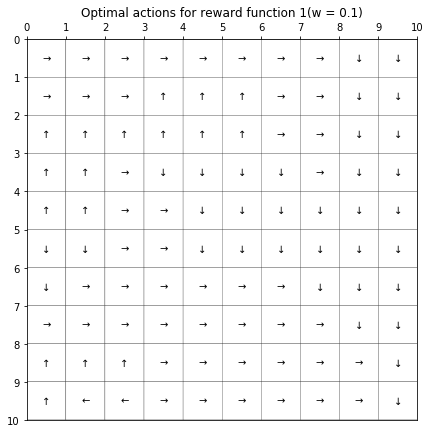

In [15]:
optimal_action_plot(optimal_action_1, title = "Optimal actions for reward function 1(w = 0.1)")

## Question 6

In [16]:
# Here, reward = reward_2
#action_space = [(-1,0),(1,0),(0,-1),(0,1)]  #respectively up, down, left, right
reward = reward_2
optimal_value_2, optimal_action_2, iterations_2 = optimal_state_value(reward, gamma, epsilon)
#optimal_value_2
optimal_action_2
#iterations_2

array([[1., 1., 1., 2., 2., 3., 3., 3., 3., 1.],
       [1., 1., 1., 2., 2., 0., 3., 3., 3., 1.],
       [1., 1., 1., 2., 2., 1., 3., 3., 3., 1.],
       [1., 1., 1., 2., 2., 1., 1., 0., 3., 1.],
       [1., 1., 1., 2., 2., 1., 1., 1., 3., 1.],
       [1., 1., 1., 2., 2., 1., 1., 2., 3., 1.],
       [1., 1., 1., 1., 1., 1., 2., 2., 3., 1.],
       [1., 1., 1., 1., 1., 1., 2., 1., 1., 1.],
       [3., 3., 3., 1., 1., 1., 1., 1., 1., 1.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 1.]])

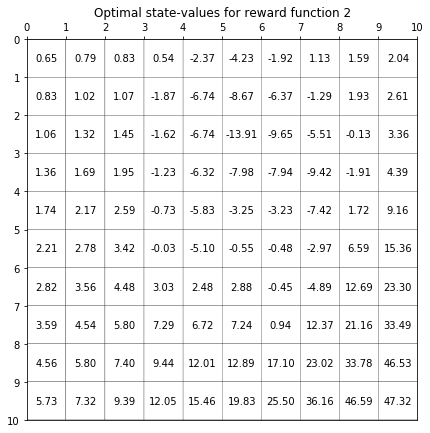

In [17]:
optimal_value_plot(optimal_value_2, title = "Optimal state-values for reward function 2")

## Question 7

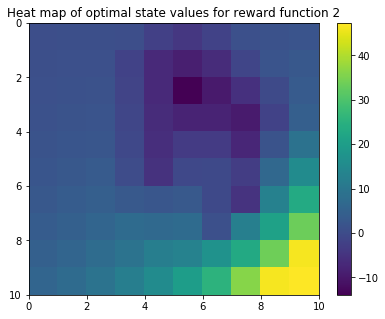

In [18]:
fig, ax = plt.subplots(1,1,figsize=(6.5,5))
plt.sca(ax)
plt.pcolor(optimal_value_2)
ax.invert_yaxis()
plt.title("Heat map of optimal state values for reward function 2")
plt.colorbar()
plt.show()

## Question 8

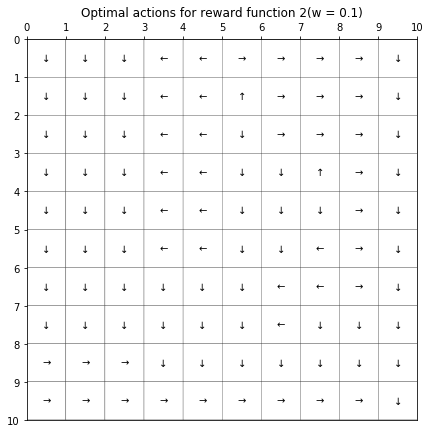

In [19]:
optimal_action_plot(optimal_action_2, title = "Optimal actions for reward function 2(w = 0.1)")

## Question 9

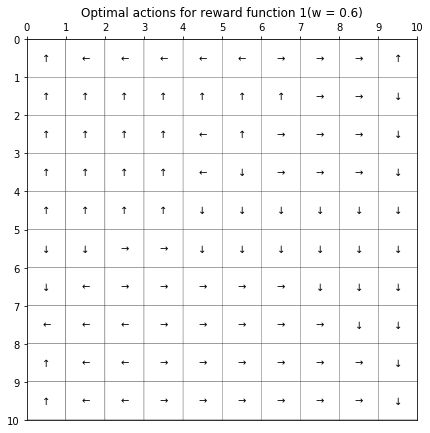

In [20]:
reward = reward_1
w = 0.6
optimal_value_1, optimal_action_1, iterations_1 = optimal_state_value(reward, gamma, epsilon)
optimal_action_plot(optimal_action_1, title = "Optimal actions for reward function 1(w = 0.6)")

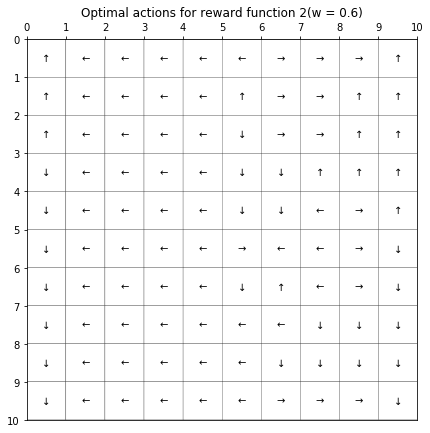

In [21]:
reward = reward_2
w = 0.6
optimal_value_2, optimal_action_2, iterations_2 = optimal_state_value(reward, gamma, epsilon)
optimal_action_plot(optimal_action_2, title = "Optimal actions for reward function 2(w = 0.6)")

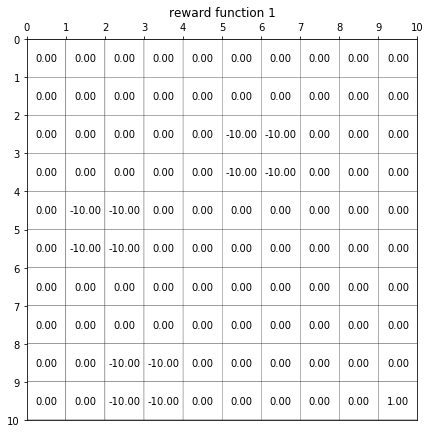

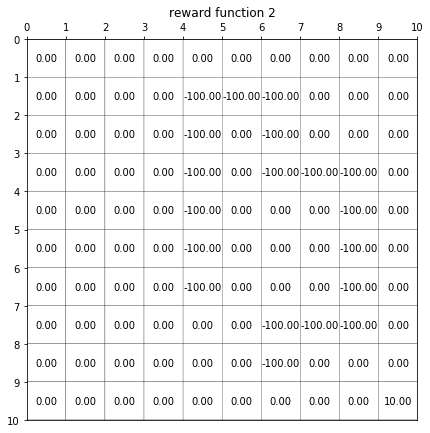

In [22]:
optimal_value_plot(reward_1, title = "reward function 1")
optimal_value_plot(reward_2, title = "reward function 2")

对比一下我感觉是w=0.1要好些

## Question 11

In [23]:
w=0.1
reward = reward_1
optimal_value_1, optimal_action_1, iterations_1 = optimal_state_value(reward, gamma, epsilon)
optimal_action_1

array([[3., 3., 3., 3., 3., 3., 3., 3., 1., 1.],
       [3., 3., 3., 0., 0., 0., 3., 3., 1., 1.],
       [0., 0., 0., 0., 0., 0., 3., 3., 1., 1.],
       [0., 0., 3., 1., 1., 1., 1., 3., 1., 1.],
       [0., 0., 3., 3., 1., 1., 1., 1., 1., 1.],
       [1., 1., 3., 3., 1., 1., 1., 1., 1., 1.],
       [1., 3., 3., 3., 3., 3., 3., 1., 1., 1.],
       [3., 3., 3., 3., 3., 3., 3., 3., 1., 1.],
       [0., 0., 0., 3., 3., 3., 3., 3., 3., 1.],
       [0., 2., 2., 3., 3., 3., 3., 3., 3., 1.]])

In [24]:
#90
rubbish_policy_1 = np.zeros((10, 10))

for r in range(optimal_value_1.shape[0]):
    for c in range(optimal_value_1.shape[0]):
        if optimal_action_1[r][c] == 0:
            rubbish_policy_1[r][c] = 3
        elif optimal_action_1[r][c] == 1:
            rubbish_policy_1[r][c] = 2
        elif optimal_action_1[r][c] == 2:
            rubbish_policy_1[r][c] = 0
        elif optimal_action_1[r][c] == 3:
            rubbish_policy_1[r][c] = 1
rubbish_policy_1          

array([[1., 1., 1., 1., 1., 1., 1., 1., 2., 2.],
       [1., 1., 1., 3., 3., 3., 1., 1., 2., 2.],
       [3., 3., 3., 3., 3., 3., 1., 1., 2., 2.],
       [3., 3., 1., 2., 2., 2., 2., 1., 2., 2.],
       [3., 3., 1., 1., 2., 2., 2., 2., 2., 2.],
       [2., 2., 1., 1., 2., 2., 2., 2., 2., 2.],
       [2., 1., 1., 1., 1., 1., 1., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 2., 2.],
       [3., 3., 3., 1., 1., 1., 1., 1., 1., 2.],
       [3., 0., 0., 1., 1., 1., 1., 1., 1., 2.]])

In [25]:
#180
rubbish_policy_2 = np.zeros((10, 10))
for r in range(optimal_value_1.shape[0]):
    for c in range(optimal_value_1.shape[0]):
        if optimal_action_1[r][c] == 0:
            rubbish_policy_2[r][c] = 1
        elif optimal_action_1[r][c] == 1:
            rubbish_policy_2[r][c] = 0
        elif optimal_action_1[r][c] == 2:
            rubbish_policy_2[r][c] = 3
        elif optimal_action_1[r][c] == 3:
            rubbish_policy_2[r][c] = 2
rubbish_policy_2

array([[2., 2., 2., 2., 2., 2., 2., 2., 0., 0.],
       [2., 2., 2., 1., 1., 1., 2., 2., 0., 0.],
       [1., 1., 1., 1., 1., 1., 2., 2., 0., 0.],
       [1., 1., 2., 0., 0., 0., 0., 2., 0., 0.],
       [1., 1., 2., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 2., 0., 0., 0., 0., 0., 0.],
       [0., 2., 2., 2., 2., 2., 2., 0., 0., 0.],
       [2., 2., 2., 2., 2., 2., 2., 2., 0., 0.],
       [1., 1., 1., 2., 2., 2., 2., 2., 2., 0.],
       [1., 3., 3., 2., 2., 2., 2., 2., 2., 0.]])

In [26]:
rubbish_policy_3 = np.zeros((10, 10))
for r in range(optimal_value_1.shape[0]):
    for c in range(optimal_value_1.shape[0]):
        if optimal_action_1[r][c] == 0:
            rubbish_policy_3[r][c] = 2
        elif optimal_action_1[r][c] == 1:
            rubbish_policy_3[r][c] = 3
        elif optimal_action_1[r][c] == 2:
            rubbish_policy_3[r][c] = 1
        elif optimal_action_1[r][c] == 3:
            rubbish_policy_3[r][c] = 0

rubbish_policy_3

array([[0., 0., 0., 0., 0., 0., 0., 0., 3., 3.],
       [0., 0., 0., 2., 2., 2., 0., 0., 3., 3.],
       [2., 2., 2., 2., 2., 2., 0., 0., 3., 3.],
       [2., 2., 0., 3., 3., 3., 3., 0., 3., 3.],
       [2., 2., 0., 0., 3., 3., 3., 3., 3., 3.],
       [3., 3., 0., 0., 3., 3., 3., 3., 3., 3.],
       [3., 0., 0., 0., 0., 0., 0., 3., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 3.],
       [2., 2., 2., 0., 0., 0., 0., 0., 0., 3.],
       [2., 1., 1., 0., 0., 0., 0., 0., 0., 3.]])

In [27]:
from cvxopt import solvers, matrix
import pandas as pd
import numpy.matlib
solvers.options['show_progress'] = False
w=0.1

def get_matrix_from_policy(policy):

    transition_matrix = np.zeros((len(policy)*len(policy[0]), len(policy)*len(policy[0])))
    for r in range(0, 10):
        for c in range(0, 10):
            curr_state = (r, c)
            curr_state_index = r+c*policy.shape[0]
            v_a, n_v_a = get_valid_actions(curr_state) 
            a = action_space[int(policy[r][c])] #The action taken given by the policy
            
            if n_v_a == 4:  
                intended_next_state = tuple_add(curr_state, a)
            elif n_v_a == 3:   
                if isValidAction(curr_state, a):
                    intended_next_state = tuple_add(curr_state, a)
                    probability_staying = w/4
                    transition_matrix[curr_state_index][curr_state_index] = probability_staying
                else:
                    intended_next_state = curr_state
                    probability_staying = 1 - w + w/4
                    transition_matrix[curr_state_index][curr_state_index] = probability_staying
            else:  
                if isValidAction(curr_state, a):
                    intended_next_state = tuple_add(curr_state, a)
                    probability_staying = (w/4) * 2
                    transition_matrix[curr_state_index][curr_state_index] = probability_staying
                else:
                    intended_next_state = curr_state
                    probability_staying = (1 - w + w/4 + w/4)
                    transition_matrix[curr_state_index][curr_state_index] = probability_staying
                    
            for p_a in v_a: 
                actual_next_state = tuple_add(curr_state, p_a)
                if intended_next_state == actual_next_state:
                    probability = 1 - w + w/4
                else:
                    probability = w/4
                next_state_index = actual_next_state[0] + actual_next_state[1]*policy.shape[0]
                transition_matrix[curr_state_index][next_state_index] = probability
    return transition_matrix
                
# def policy_diff_matrix(P_a1, P_a2,gamma):
#     return np.dot((P_a1-P_a2), np.linalg.inv(np.identity(P_a1.shape[0])-gamma*P_a1))

def policy_diff_matrix(P_a1, P_a2, gamma):
    return np.dot((P_a1-P_a2), np.linalg.inv(np.identity(P_a1.shape[0])-gamma*P_a1))
               
def LP_params(opt_policy, r_max, gamma, rubbish_policy_1, rubbish_policy_2, rubbish_policy_3):
#     P_a1 = get_matrix_from_policy(opt_policy, num_actions, random_action_probility)
#     P_a2 = get_matrix_from_policy(np.mod(opt_policy+1, num_actions), num_actions, random_action_probility)
#     P_a3 = get_matrix_from_policy(np.mod(opt_policy+2, num_actions), num_actions, random_action_probility)
#     P_a4 = get_matrix_from_policy(np.mod(opt_policy+3, num_actions), num_actions, random_action_probility)
    P_a1 = get_matrix_from_policy(opt_policy)
    P_a2 = get_matrix_from_policy(rubbish_policy_1)
    P_a3 = get_matrix_from_policy(rubbish_policy_2)
    P_a4 = get_matrix_from_policy(rubbish_policy_3)
    
    N = np.ma.size(opt_policy)
    I_NxN = np.identity(N)
    zero_NxN = np.zeros((N, N))
    
    D_row_1 = np.concatenate([I_NxN, zero_NxN, -policy_diff_matrix(P_a1, P_a2, gamma)],axis=1)
    D_row_2 = np.concatenate([I_NxN, zero_NxN, -policy_diff_matrix(P_a1, P_a3, gamma)],axis=1)
    D_row_3 = np.concatenate([I_NxN, zero_NxN, -policy_diff_matrix(P_a1, P_a4, gamma)],axis=1)
    D_row_4 = np.concatenate([zero_NxN, zero_NxN, -policy_diff_matrix(P_a1, P_a2, gamma)],axis=1)
    D_row_5 = np.concatenate([zero_NxN, zero_NxN, -policy_diff_matrix(P_a1, P_a3, gamma)],axis=1)
    D_row_6 = np.concatenate([zero_NxN, zero_NxN, -policy_diff_matrix(P_a1, P_a4, gamma)],axis=1)
    D_row_7 = np.concatenate([zero_NxN, -I_NxN, I_NxN],axis=1)
    D_row_8 = np.concatenate([zero_NxN, -I_NxN, -I_NxN],axis=1)
    D_row_9 = np.concatenate([zero_NxN, zero_NxN, I_NxN],axis=1)
    D_row_10 = np.concatenate([zero_NxN, zero_NxN, -I_NxN],axis=1)
    
#     D_row_1 = np.concatenate([-policy_diff_matrix(P_a1, P_a2, gamma), I_NxN, zero_NxN],axis=1)
#     D_row_2 = np.concatenate([-policy_diff_matrix(P_a1, P_a3, gamma), I_NxN, zero_NxN],axis=1)
#     D_row_3 = np.concatenate([-policy_diff_matrix(P_a1, P_a4, gamma), I_NxN, zero_NxN],axis=1)
#     D_row_4 = np.concatenate([-policy_diff_matrix(P_a1, P_a2, gamma), zero_NxN, zero_NxN],axis=1)
#     D_row_5 = np.concatenate([-policy_diff_matrix(P_a1, P_a3, gamma), zero_NxN, zero_NxN],axis=1)
#     D_row_6 = np.concatenate([-policy_diff_matrix(P_a1, P_a4, gamma), zero_NxN, zero_NxN],axis=1)
#     D_row_7 = np.concatenate([I_NxN, zero_NxN, -I_NxN],axis=1)
#     D_row_8 = np.concatenate([-I_NxN, zero_NxN, -I_NxN],axis=1)
#     D_row_9 = np.concatenate([I_NxN, zero_NxN, zero_NxN],axis=1)
#     D_row_10 = np.concatenate([-I_NxN, zero_NxN, zero_NxN],axis=1)
    
    D_rows =  [D_row_1,D_row_2,D_row_3,D_row_4,D_row_5,D_row_6,D_row_7,D_row_8,D_row_9,D_row_10]
    D = np.concatenate(D_rows,axis=0)
    
    b = np.concatenate([np.zeros((8*N, 1)), r_max*np.ones((2*N, 1))])
    return D, b

In [28]:
w = 0.1
gamma = 0.8
epsilon = 0.01

# V_1, P_1, _ = optimal_state_value(reward_1, w, gamma, epsilon)
D, b = LP_params(optimal_action_1, 1, gamma, rubbish_policy_1, rubbish_policy_2, rubbish_policy_3)

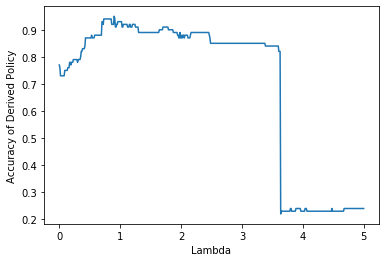

In [29]:
#optimal_state_value(reward, w, gamma, epsilon)
#optimal_value_1, optimal_action_1, iterations_1 = optimal_state_value(reward, w, gamma, epsilon)
w=0.1
accuracies_1 = np.zeros(500)
N = np.ma.size(optimal_action_1)
for i, L1 in enumerate(np.linspace(0, 5, 500)):
    c = np.concatenate([np.ones((N,)), -L1*np.ones((N,)), np.zeros((N,))])    
    sol = solvers.lp(matrix(-c), matrix(D), matrix(b))
    opt_x = np.array(sol['x'])
    R = np.transpose(np.reshape(opt_x[200:],(10, 10)))
    v, p, _ = optimal_state_value(R,  gamma, epsilon)
    accuracy = np.sum(optimal_action_1==p)/p.size
    accuracies_1[i]=accuracy

plt.plot(np.linspace(0,5,500),accuracies_1)
plt.xlabel('Lambda')
plt.ylabel('Accuracy of Derived Policy')
plt.show()

## Question 12

In [30]:
lamdas = np.linspace(0, 5, 500)
best_lamda_1 = max(lamdas[accuracies_1 == np.max(accuracies_1)])
print('Best Lamda:', best_lamda_1)
print('The best accuracy:', max(accuracies_1))

Best Lamda: 0.9018036072144289
The best accuracy: 0.95


## Quesiton 13

In [31]:
D, b = LP_params(optimal_action_1, 1, gamma, rubbish_policy_1, rubbish_policy_2, rubbish_policy_3)
c = np.concatenate([np.ones((N,)), -best_lamda_1*np.ones((N,)), np.zeros((N,))])    
sol = solvers.lp(matrix(-c), matrix(D), matrix(b))
opt_x = np.array(sol['x'])
R_1 = np.transpose(np.reshape(opt_x[200:],(10, 10)))

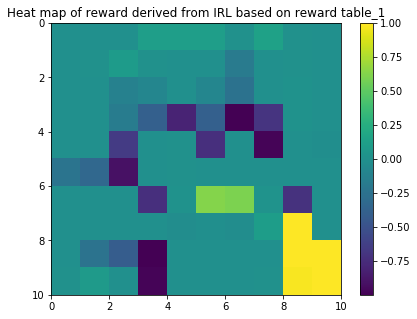

In [32]:
fig, ax = plt.subplots(1,1,figsize=(6.5,5))
plt.sca(ax)
plt.pcolor(R_1)
ax.invert_yaxis()
plt.title("Heat map of reward derived from IRL based on reward table_1")
plt.colorbar()
plt.show()

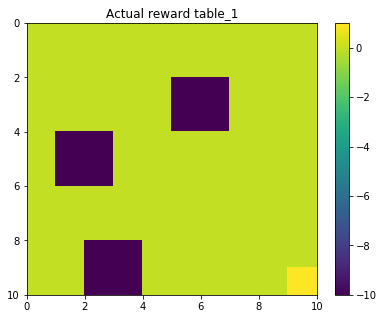

In [33]:
fig, ax = plt.subplots(1,1,figsize=(6.5,5))
plt.sca(ax)
plt.pcolor(reward_1)
ax.invert_yaxis()
plt.title("Actual reward table_1")
plt.colorbar()
plt.show()

## Quesiton 14

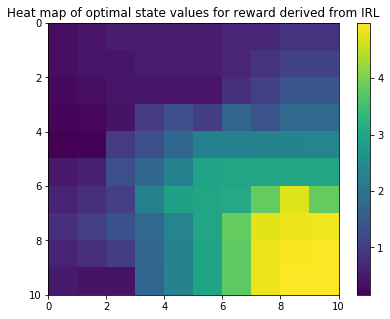

In [34]:
w = 0.1
gamma = 0.8
epsilon = 0.01
optimal_value_1_IRL, _, _ = optimal_state_value(R_1,  gamma, epsilon)

fig, ax = plt.subplots(1,1,figsize=(6.5,5))
plt.sca(ax)
plt.pcolor(optimal_value_1_IRL)
ax.invert_yaxis()
plt.title("Heat map of optimal state values for reward derived from IRL")
plt.colorbar()
plt.show()

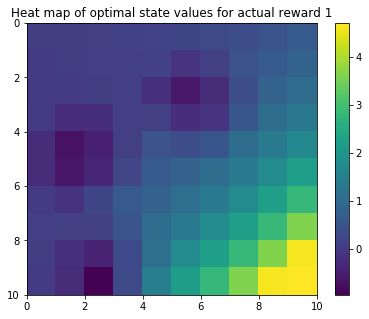

In [35]:
w = 0.1
gamma = 0.8
epsilon = 0.01
optimal_value_1, _, _ = optimal_state_value(reward_1,  gamma, epsilon)

fig, ax = plt.subplots(1,1,figsize=(6.5,5))
plt.sca(ax)
plt.pcolor(optimal_value_1)
ax.invert_yaxis()
plt.title("Heat map of optimal state values for actual reward 1")
plt.colorbar()
plt.show()

## Question 15 & 17

**We will discuss these two parts in Report**

## Question 16

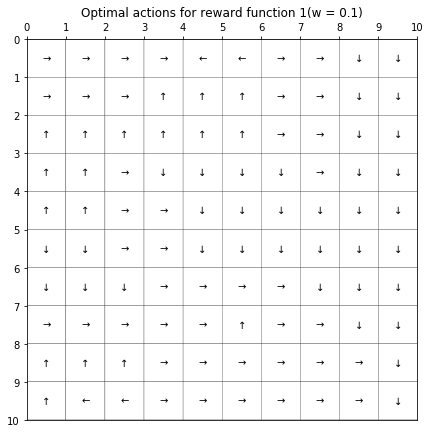

In [36]:
_, optimal_action_1_IRL, _ = optimal_state_value(R_1,  gamma, epsilon)
optimal_action_plot(optimal_action_1_IRL, title = "Optimal actions for reward function 1(w = 0.1)")

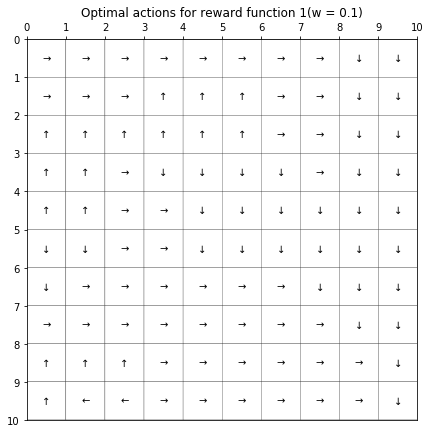

In [37]:
optimal_action_plot(optimal_action_1, title = "Optimal actions for reward function 1(w = 0.1)")

## Question 18

In [38]:
optimal_value_2, optimal_action_2, iterations_2 = optimal_state_value(reward_2, gamma, epsilon)
optimal_action_2

array([[1., 1., 1., 2., 2., 3., 3., 3., 3., 1.],
       [1., 1., 1., 2., 2., 0., 3., 3., 3., 1.],
       [1., 1., 1., 2., 2., 1., 3., 3., 3., 1.],
       [1., 1., 1., 2., 2., 1., 1., 0., 3., 1.],
       [1., 1., 1., 2., 2., 1., 1., 1., 3., 1.],
       [1., 1., 1., 2., 2., 1., 1., 2., 3., 1.],
       [1., 1., 1., 1., 1., 1., 2., 2., 3., 1.],
       [1., 1., 1., 1., 1., 1., 2., 1., 1., 1.],
       [3., 3., 3., 1., 1., 1., 1., 1., 1., 1.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 1.]])

In [39]:
#90
rubbish_policy_1_2 = np.zeros((10, 10))

for r in range(optimal_value_1.shape[0]):
    for c in range(optimal_value_1.shape[0]):
        if optimal_action_2[r][c] == 0:
            rubbish_policy_1_2[r][c] = 3
        elif optimal_action_2[r][c] == 1:
            rubbish_policy_1_2[r][c] = 2
        elif optimal_action_2[r][c] == 2:
            rubbish_policy_1_2[r][c] = 0
        elif optimal_action_2[r][c] == 3:
            rubbish_policy_1_2[r][c] = 1
rubbish_policy_1_2

array([[2., 2., 2., 0., 0., 1., 1., 1., 1., 2.],
       [2., 2., 2., 0., 0., 3., 1., 1., 1., 2.],
       [2., 2., 2., 0., 0., 2., 1., 1., 1., 2.],
       [2., 2., 2., 0., 0., 2., 2., 3., 1., 2.],
       [2., 2., 2., 0., 0., 2., 2., 2., 1., 2.],
       [2., 2., 2., 0., 0., 2., 2., 0., 1., 2.],
       [2., 2., 2., 2., 2., 2., 0., 0., 1., 2.],
       [2., 2., 2., 2., 2., 2., 0., 2., 2., 2.],
       [1., 1., 1., 2., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 2.]])

In [40]:
#180
rubbish_policy_2_2= np.zeros((10, 10))
for r in range(optimal_value_1.shape[0]):
    for c in range(optimal_value_1.shape[0]):
        if optimal_action_2[r][c] == 0:
            rubbish_policy_2_2[r][c] = 1
        elif optimal_action_2[r][c] == 1:
            rubbish_policy_2_2[r][c] = 0
        elif optimal_action_2[r][c] == 2:
            rubbish_policy_2_2[r][c] = 3
        elif optimal_action_2[r][c] == 3:
            rubbish_policy_2_2[r][c] = 2
rubbish_policy_2_2

array([[0., 0., 0., 3., 3., 2., 2., 2., 2., 0.],
       [0., 0., 0., 3., 3., 1., 2., 2., 2., 0.],
       [0., 0., 0., 3., 3., 0., 2., 2., 2., 0.],
       [0., 0., 0., 3., 3., 0., 0., 1., 2., 0.],
       [0., 0., 0., 3., 3., 0., 0., 0., 2., 0.],
       [0., 0., 0., 3., 3., 0., 0., 3., 2., 0.],
       [0., 0., 0., 0., 0., 0., 3., 3., 2., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [2., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 0.]])

In [41]:
#270
rubbish_policy_3_2 = np.zeros((10, 10))
for r in range(optimal_value_1.shape[0]):
    for c in range(optimal_value_1.shape[0]):
        if optimal_action_2[r][c] == 0:
            rubbish_policy_3_2[r][c] = 2
        elif optimal_action_2[r][c] == 1:
            rubbish_policy_3_2[r][c] = 3
        elif optimal_action_2[r][c] == 2:
            rubbish_policy_3_2[r][c] = 1
        elif optimal_action_2[r][c] == 3:
            rubbish_policy_3_2[r][c] = 0

rubbish_policy_3_2

array([[3., 3., 3., 1., 1., 0., 0., 0., 0., 3.],
       [3., 3., 3., 1., 1., 2., 0., 0., 0., 3.],
       [3., 3., 3., 1., 1., 3., 0., 0., 0., 3.],
       [3., 3., 3., 1., 1., 3., 3., 2., 0., 3.],
       [3., 3., 3., 1., 1., 3., 3., 3., 0., 3.],
       [3., 3., 3., 1., 1., 3., 3., 1., 0., 3.],
       [3., 3., 3., 3., 3., 3., 1., 1., 0., 3.],
       [3., 3., 3., 3., 3., 3., 1., 3., 3., 3.],
       [0., 0., 0., 3., 3., 3., 3., 3., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]])

In [42]:
w = 0.1
gamma = 0.8
epsilon = 0.01

D, b = LP_params(optimal_action_2, 10, gamma, rubbish_policy_1_2, rubbish_policy_2_2, rubbish_policy_3_2)

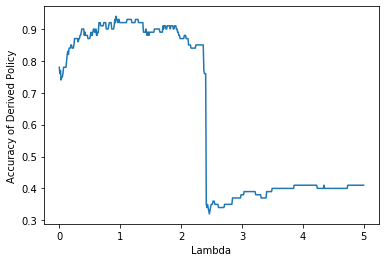

In [43]:
accuracies_2 = np.zeros(500)
N = np.ma.size(optimal_action_2)
for i, L2 in enumerate(np.linspace(0, 5, 500)):
    c = np.concatenate([np.ones((N,)), -L2*np.ones((N,)), np.zeros((N,))])    
    sol = solvers.lp(matrix(-c), matrix(D), matrix(b))
    opt_x = np.array(sol['x'])
    R = np.transpose(np.reshape(opt_x[200:],(10, 10)))
    v, p, _ = optimal_state_value(R, gamma, epsilon)
    accuracy = np.sum(optimal_action_2==p)/p.size
    accuracies_2[i]=accuracy

plt.plot(np.linspace(0,5,500),accuracies_2)
plt.xlabel('Lambda')
plt.ylabel('Accuracy of Derived Policy')
plt.show()

## Question 19

In [44]:
lamdas = np.linspace(0, 5, 500)
best_lamda_2 = max(lamdas[accuracies_2 == np.max(accuracies_2)])
print('Best Lamda:', best_lamda_2)
print('The best accuracy:', max(accuracies_2))

Best Lamda: 0.9318637274549098
The best accuracy: 0.94


## Question 20

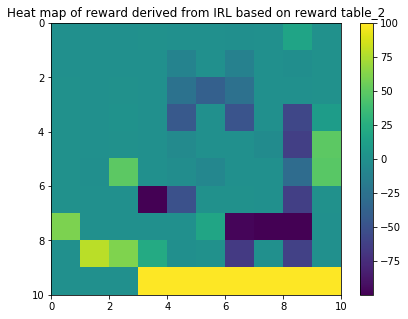

In [45]:
D, b = LP_params(optimal_action_2, 100, gamma, rubbish_policy_1_2, rubbish_policy_2_2, rubbish_policy_3_2)
c = np.concatenate([np.ones((N,)), -best_lamda_2*np.ones((N,)), np.zeros((N,))])    
sol = solvers.lp(matrix(-c), matrix(D), matrix(b))
opt_x = np.array(sol['x'])
R_2 = np.transpose(np.reshape(opt_x[200:],(10, 10)))
fig, ax = plt.subplots(1,1,figsize=(6.5,5))
plt.sca(ax)
plt.pcolor(R_2)
ax.invert_yaxis()
plt.title("Heat map of reward derived from IRL based on reward table_2")
plt.colorbar()
plt.show()

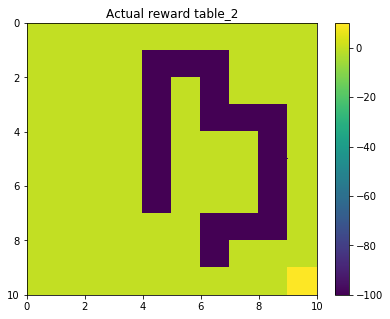

In [46]:
fig, ax = plt.subplots(1,1,figsize=(6.5,5))
plt.sca(ax)
plt.pcolor(reward_2)
ax.invert_yaxis()
plt.title("Actual reward table_2")
plt.colorbar()
plt.show()

## Question 21

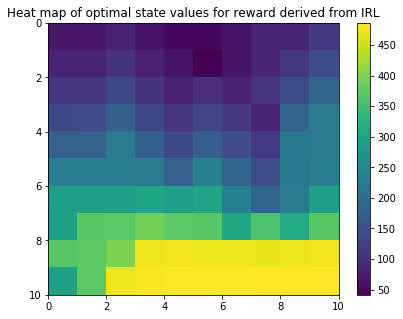

In [47]:
w = 0.1
gamma = 0.8
epsilon = 0.01
optimal_value_2_IRL, _, _ = optimal_state_value(R_2,  gamma, epsilon)

fig, ax = plt.subplots(1,1,figsize=(6.5,5))
plt.sca(ax)
plt.pcolor(optimal_value_2_IRL)
ax.invert_yaxis()
plt.title("Heat map of optimal state values for reward derived from IRL")
plt.colorbar()
plt.show()

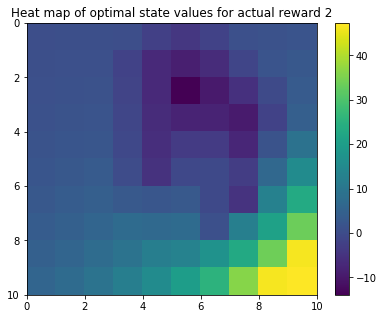

In [48]:
w = 0.1
gamma = 0.8
epsilon = 0.01
optimal_value_2, _, _ = optimal_state_value(reward_2,  gamma, epsilon)

fig, ax = plt.subplots(1,1,figsize=(6.5,5))
plt.sca(ax)
plt.pcolor(optimal_value_2)
ax.invert_yaxis()
plt.title("Heat map of optimal state values for actual reward 2")
plt.colorbar()
plt.show()

## Question 22 & Question 24

**We will discuss this two parts in Report**

## Question 23

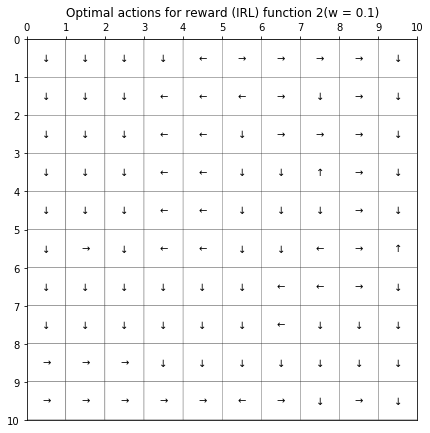

In [49]:
_, optimal_action_2_IRL, _ = optimal_state_value(R_2,  gamma, epsilon)
optimal_action_plot(optimal_action_2_IRL, title = "Optimal actions for reward (IRL) function 2(w = 0.1)")

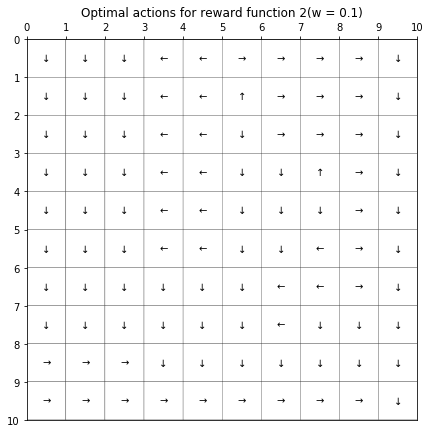

In [50]:
optimal_action_plot(optimal_action_2, title = "Optimal actions for reward function 2(w = 0.1)")

## Question 25

In [51]:
w = 0.1
def get_matrix_from_policy(policy):
    transition_matrix = np.zeros((len(policy)*len(policy[0]), len(policy)*len(policy[0])))
    for r in range(0, 10):
        for c in range(0, 10):
            curr_state = (r, c)
            curr_state_index = r+c*policy.shape[0]
            v_a, n_v_a = get_valid_actions(curr_state) 
            a = action_space[int(policy[r][c])] #The action taken given by the policy
            
            if n_v_a == 4:  
                intended_next_state = tuple_add(curr_state, a)
            elif n_v_a == 3:   
                if isValidAction(curr_state, a):
                    intended_next_state = tuple_add(curr_state, a)
                    probability_staying = w/4
                    transition_matrix[curr_state_index][curr_state_index] = probability_staying
                else:
                    intended_next_state = curr_state
                    probability_staying = 1 - w + w/4
                    transition_matrix[curr_state_index][curr_state_index] = probability_staying
            else:  
                if isValidAction(curr_state, a):
                    intended_next_state = tuple_add(curr_state, a)
                    probability_staying = (w/4) * 2
                    transition_matrix[curr_state_index][curr_state_index] = probability_staying
                else:
                    intended_next_state = curr_state
                    probability_staying = (1 - w + w/4 + w/4)
                    transition_matrix[curr_state_index][curr_state_index] = probability_staying
                    
            for p_a in v_a: 
                actual_next_state = tuple_add(curr_state, p_a)
                if intended_next_state == actual_next_state:
                    probability = 1 - w + w/4
                else:
                    probability = w/4
                next_state_index = actual_next_state[0] + actual_next_state[1]*policy.shape[0]
                transition_matrix[curr_state_index][next_state_index] = probability
    return transition_matrix

**验证**

In [52]:
w = 0.1
optimal_value_1, optimal_action_1, iterations_1 = optimal_state_value(reward_1, gamma, epsilon)
optimal_action_1
optimal_transition_matrix = get_matrix_from_policy(optimal_action_1)
print(optimal_transition_matrix)
print('-----------------------------------------------------------------------')
print(optimal_transition_matrix.sum(axis=1))
print('-----------------------------------------------------------------------')
print(100 - (optimal_transition_matrix==0).astype(int).sum(axis=1))

[[0.05  0.025 0.    ... 0.    0.    0.   ]
 [0.025 0.025 0.025 ... 0.    0.    0.   ]
 [0.    0.925 0.025 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.025 0.925 0.   ]
 [0.    0.    0.    ... 0.025 0.025 0.925]
 [0.    0.    0.    ... 0.    0.025 0.95 ]]
-----------------------------------------------------------------------
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
-----------------------------------------------------------------------
[3 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 3]


In [53]:
# optimal_action_plot(optimal_action_1, title = "Optimal actions for reward function 2(w = 0.1)")

In [54]:
w = 0.1
optimal_value_2, optimal_action_2, iterations_2 = optimal_state_value(reward_2, gamma, epsilon)
optimal_action_2
optimal_transition_matrix = get_matrix_from_policy(optimal_action_2)
print(optimal_transition_matrix)

[[0.05  0.925 0.    ... 0.    0.    0.   ]
 [0.025 0.025 0.925 ... 0.    0.    0.   ]
 [0.    0.025 0.025 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.025 0.925 0.   ]
 [0.    0.    0.    ... 0.025 0.025 0.925]
 [0.    0.    0.    ... 0.    0.025 0.95 ]]
